In [34]:
import sys
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
import pandas as pd
import numpy as np
import glob, os

from sklearn import linear_model, cross_validation, naive_bayes, ensemble, tree, neighbors, cluster, preprocessing

from pandas_datareader import data, wb
import datetime

%pylab inline
figsize(20,10)

Populating the interactive namespace from numpy and matplotlib


## ETF ticker loader

In [17]:
tickers_df = pd.read_html('http://etfdb.com/screener/')
tickers_df = tickers_df[0]

In [18]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()

for s in tickers_df.Symbol[0:1000]:
    try:
        t = data.DataReader(s, 'yahoo', start, end)
        t_close = pd.Series(t['Adj Close'], name=s)
        t_close.to_hdf('./tickers/' + s + '.h5', 'adjclose')
        
    except Exception:
        print('Problem with downloading - ', s)
        

Problem with downloading -  IBDA


In [202]:
ticker_folder = './zscore_tickers/'

In [393]:
temp_data_l = []
temp_name_l = []

tickers_df = pd.DataFrame()

direction_flag = 'long'

for file in glob.glob(ticker_folder + "*.h5"):
    
    if direction_flag == 'long':
        ticker = pd.read_hdf(file)
        
    elif direction_flag == 'short':
        ticker = (pd.read_hdf(file)) * -1
    
    else:
        raise Exception('Invalid long/short flag. Set flag to "long" or "short"')
    
    
    
        

    if int(ticker.index.year[0]) <= 2011: 
        tickers_df[ticker.name] = ticker

        price_change = ticker - ticker.shift(1)
        max_dd = (ticker - ticker.expanding().max()).min()

        period_end_price = ticker[-1]
        period_start_price = ticker[0]
        
        median_vola = (ticker - ticker.shift(1)).rolling(30).median()
        
        
        dd_lengths_d = {}

        '''for y in numpy.unique(ticker.index.year):

            expmax = ticker.ix[str(y)].expanding().max()

            same_max_bars = np.zeros_like(expmax.values)
            same_max_counter = 0

            for i in range(len(expmax)):
                if expmax[i] == expmax.shift(1)[i]:
                    same_max_counter += 1
                    same_max_bars[i] = same_max_counter

                elif expmax[i] != expmax.shift(1)[i]:
                    same_max_counter = 0
                    same_max_bars[i] = same_max_counter

            dd_lengths_d[y] = np.mean(same_max_bars)
            #print(pd.Series(same_max_bars, index=expmax.index).mean())#.plot(secondary_y=True)
            
        for period in [1,2,5]:
            
            consec_up_bars = np.zeros_like(ticker.values)
            up_counter = 0

            consec_dn_bars = np.zeros_like(ticker.values)
            dn_counter = 0

            for i in range(len(ticker)):
                if ticker[i] > ticker.shift(period)[i]:
                    up_counter += 1
                    consec_up_bars[i] = up_counter

                elif ticker[i] < ticker.shift(period)[i]:
                    up_counter = 0
                    consec_up_bars[i] = up_counter



                if ticker[i] < ticker.shift(period)[i]:
                    dn_counter += 1
                    consec_dn_bars[i] = dn_counter

                elif ticker[i] > ticker.shift(period)[i]:
                    dn_counter = 0
                    consec_dn_bars[i] = dn_counter

            updn_consec_bars_df = pd.concat([pd.Series(consec_up_bars,name='consec_up_bars'), 
                                             pd.Series(consec_dn_bars,name='consec_dn_bars')], axis=1).drop(0)

            #
            # Same thing for 1-2-5 period shift
            #
            d['average_consec_up_bars_shiftperiod'+str(period)] = updn_consec_bars_df.consec_up_bars.mean()
            d['average_consec_dn_bars_shiftperiod'+str(period)] = updn_consec_bars_df.consec_dn_bars.mean()
            d['average_consec_updn_bars_ratio_shiftperiod'+str(period)] = (updn_consec_bars_df.consec_up_bars.value_counts() / updn_consec_bars_df.consec_dn_bars.value_counts()).mean()
    '''
        
        d = {}
        
        for period in [2,5,10]:
            ema = ticker.ewm(period).mean()

            crossup = CrossUp(ticker, ema)
            crossdn = CrossDown(ticker, ema)

            days_wo_crossings_count = np.zeros_like(ticker.values)
            days_wo_crossings_counter = 0

            for i in range(len(ticker)):
                if (crossup[i] == False) | (crossdn[i] == False):
                    days_wo_crossings_counter += 1
                    days_wo_crossings_count[i] = days_wo_crossings_counter

                if (crossup[i] == True) | (crossdn[i] == True):
                    days_wo_crossings_counter = 0
                    days_wo_crossings_count[i] = days_wo_crossings_counter
                    
            d['avg_days_wo_crossings_ema'+str(period)] = pd.Series(days_wo_crossings_count).mean()       
        
        '''d = {'pricechange_modsharpe': np.mean(price_change) / np.std(price_change), 'max_dd': max_dd, 
             'recovery_factor': period_end_price / np.abs(max_dd), 
             'pct_change1_skew': ticker.pct_change(1).skew(), 'pct_change1_mean': ticker.pct_change(1).mean(),
             'pct_change1_std': ticker.pct_change(1).std(), 'pct_change1_var': ticker.pct_change(1).var(),
             'pct_change5_skew': ticker.pct_change(5).skew(), 'pct_change5_mean': ticker.pct_change(5).mean(),
             'pct_change5_std': ticker.pct_change(5).std(), 'pct_change5_var': ticker.pct_change(5).var(),
             'price_var': ticker.var(), 'price_std': ticker.std(), 'median_vola_median': median_vola.median(),
             'median_vola_quantile90': median_vola.quantile(0.9), 'median_vola_quantile10': median_vola.quantile(0.1),
             'median_vola_range': median_vola.quantile(0.9) - median_vola.quantile(0.1), 'average_dd_length': np.mean(list(dd_lengths_d.values())),
            }
        
        for k in dd_lengths_d.keys():
            d['average_dd_length_in_'+str(k)] = dd_lengths_d[k]'''
            

        temp_data_l.append(d)
        temp_name_l.append(ticker.name)

In [156]:
#ticker = pd.read_hdf('./tickers\\MFLA.h5')
#ticker

In [421]:
ticker_stats_df = pd.DataFrame(temp_data_l, index=temp_name_l).dropna()

ticker_stats_df['avg_days_wo_crossings_sum'] = ticker_stats_df.sum(1)

#ticker_stats_df.sort_values('avg_days_wo_crossings_sum', ascending=False)
ticker_stats_df.sort_values('avg_days_wo_crossings_sum', ascending=False)
#ticker_stats_df.ix['MINT']

,avg_days_wo_crossings_ema10,avg_days_wo_crossings_ema2,avg_days_wo_crossings_ema5,avg_days_wo_crossings_sum
EVGN,31.510147,26.638209,29.461861,87.610217
NVGS,27.315919,21.354026,23.090350,71.760295
DOOR,28.044868,17.251998,22.752305,68.049170
HYLD,35.048676,5.901217,14.721546,55.671439
GPRK,21.930912,12.649573,15.590456,50.170940
HYS,27.790476,5.713492,11.930952,45.434921
CNCO,19.941853,11.035783,14.023003,45.000639
HYMB,26.172546,4.691718,12.808282,43.672546
PSK,19.049170,5.368777,12.550092,36.968039
PGF,21.336202,5.009219,10.147511,36.492932


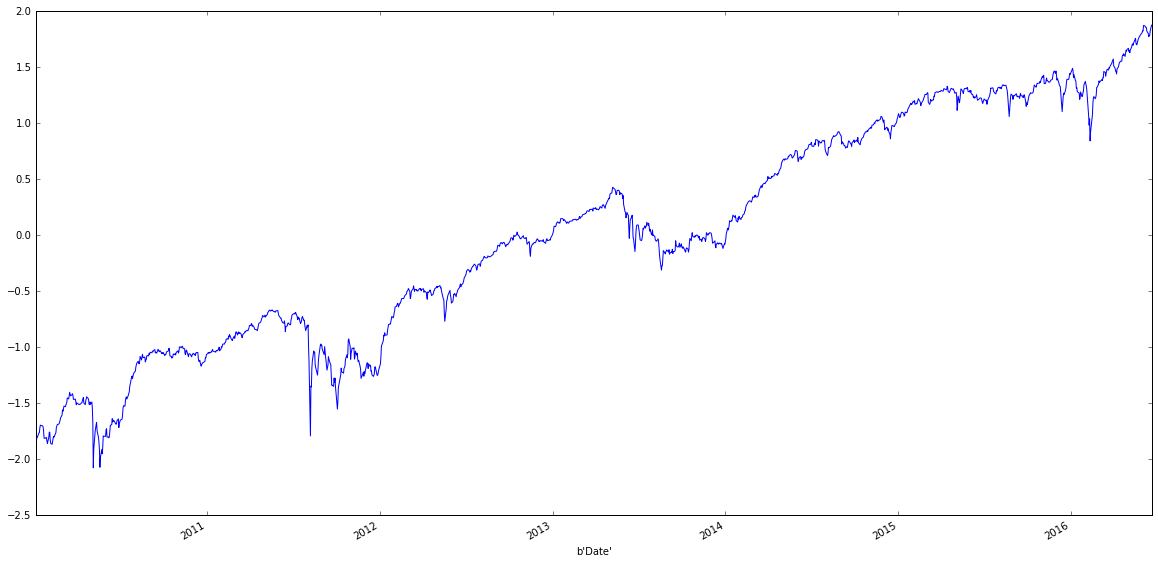

In [431]:
tickers_df['PFF'].plot()

In [406]:
#ticker_stats_df.sum(1)
ticker_stats_df.mean(1)

A       6.270232
AA      6.838353
AAN     7.443966
AAP     6.574063
AAT     6.692514
AAV     6.119238
AAXJ    5.783241
AB      6.807621
ABB     6.562385
ABC     8.932596
ABEV    6.355870
ABG     6.960459
ABM     5.984225
ABR     6.417947
ABT     6.611965
ABX     7.203442
ACC     5.796353
ACCO    7.046917
ACH     6.124360
ACM     7.056546
ACN     6.756402
ACP     7.580265
ACW     7.333123
ACWI    6.221676
ACWV    8.105144
ACWX    5.821348
ADC     7.180701
ADM     6.459127
ADRD    5.617087
ADRE    6.126409
          ...   
WOOD    6.767875
WPS     7.203442
XAR     6.894220
XBI     6.044048
XES     6.555214
XHB     6.180701
XHS     6.812290
XIV     7.340248
XLB     6.350338
XLE     7.948166
XLF     6.093219
XLG     7.415898
XLI     6.668715
XLK     6.967630
XLP     7.990166
XLU     6.493342
XLV     6.778734
XLY     6.994878
XME     6.590248
XMPT    9.415661
XOP     6.728129
XPH     6.589019
XRT     7.177423
XSD     6.940791
XTN     6.106529
YANG    7.035239
YCS     6.182135
YINN    6.9045

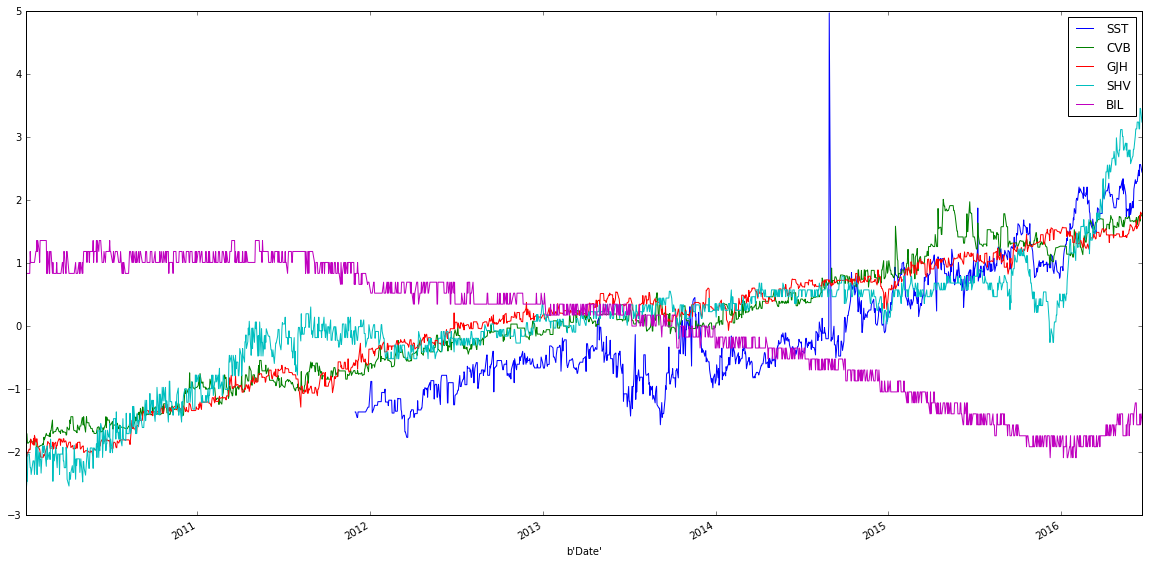

In [391]:
tickers_df[ticker_stats_df.sort_values('avg_days_wo_crossings_ema10', ascending=False).index[-5:]].plot()

In [234]:
ticker_stats_df[ticker_stats_df.cluster == cluster_n]
ticker_stats_df.cluster.describe()

count    940.000000
mean       3.075532
std        2.486521
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        7.000000
Name: cluster, dtype: float64

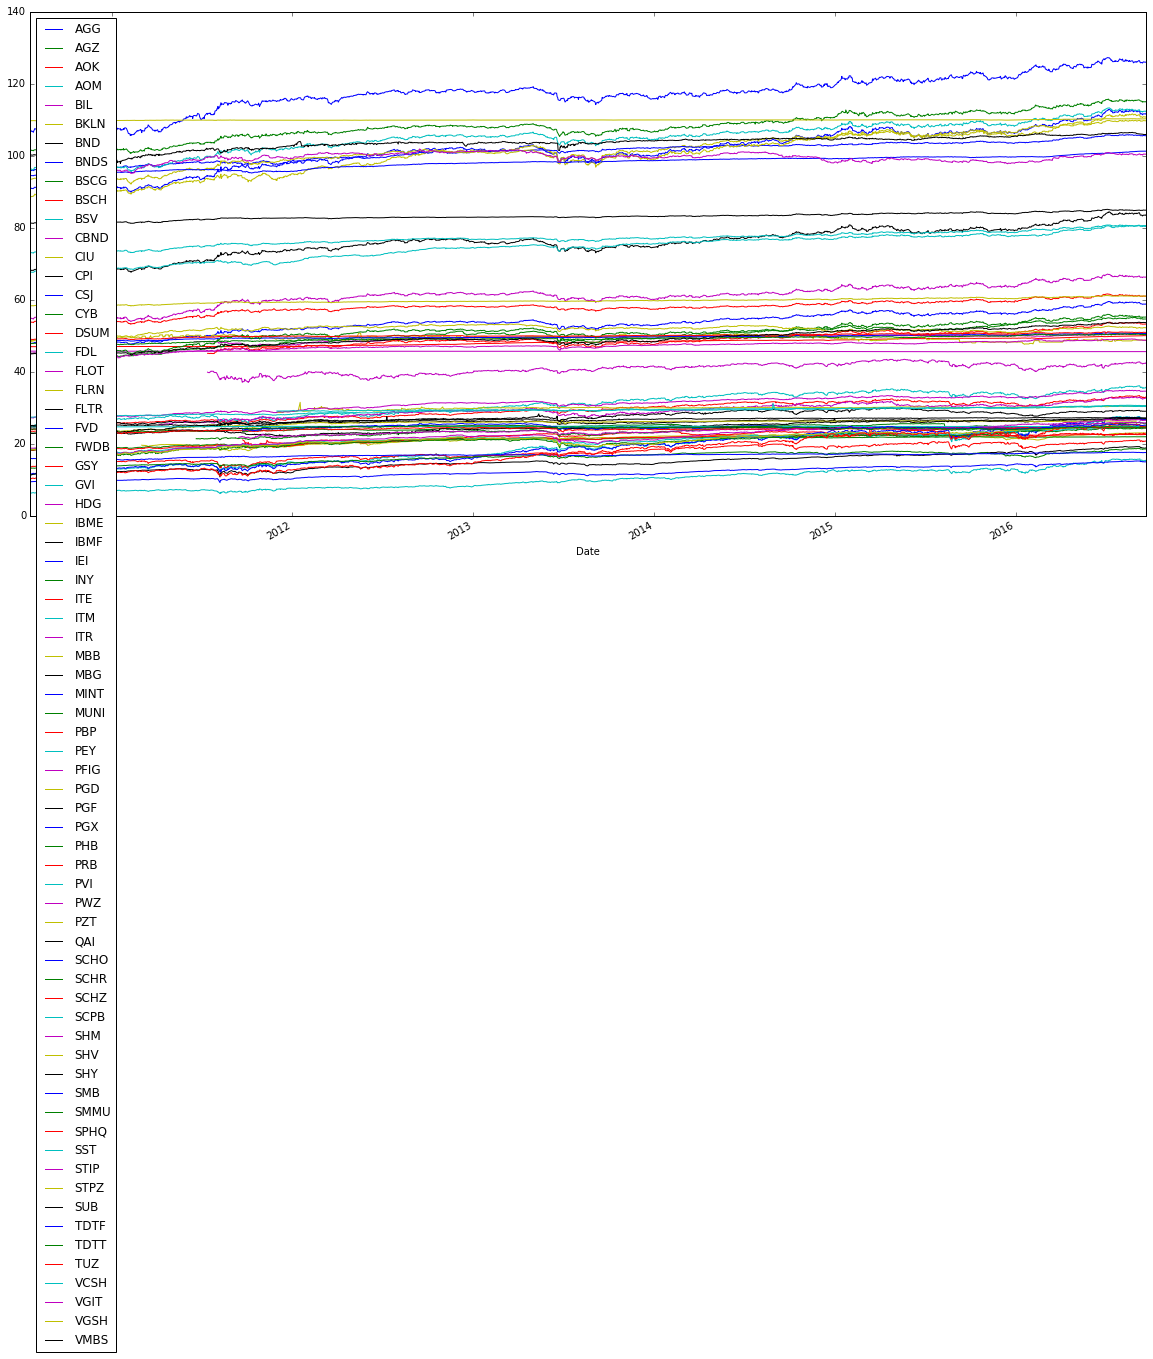

In [92]:
tickers_df[ticker_stats_df[ticker_stats_df.cluster == 1].index]#.plot()

# Features for clustering

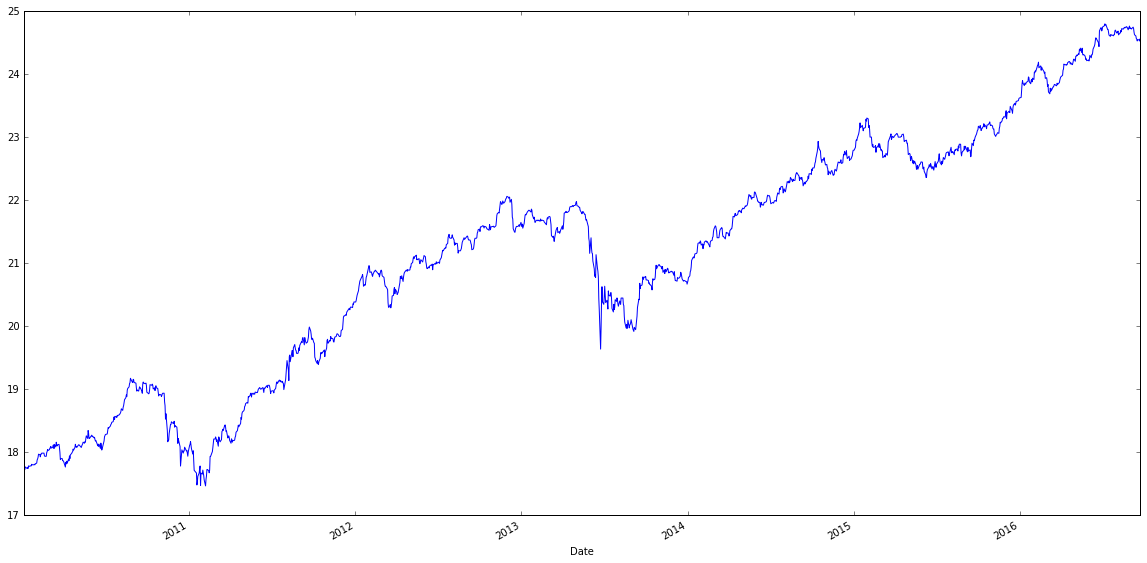

In [350]:
#ticker = tickers_df.sample(1, axis=1)

ticker.plot()

In [351]:
# Simple volatility stats
print(ticker.ix['2014'].std()) # overall stats and by year(?)
print(ticker.ix['2014'].var()) # overall stats and by year

0.5045624244930516
0.25458324021030637


In [352]:
# Simple ptice change stats
# Also for periods 5-10-20-100
print(ticker.pct_change(10).skew())
print(ticker.pct_change(10).mean())
print(ticker.pct_change(10).median())
print(ticker.pct_change(10).var())
print(ticker.pct_change(10).std())

-0.745166815667
0.0019879211600845274
0.002679791415225452
9.922599235027579e-05
0.009961224440312335


0.0148475


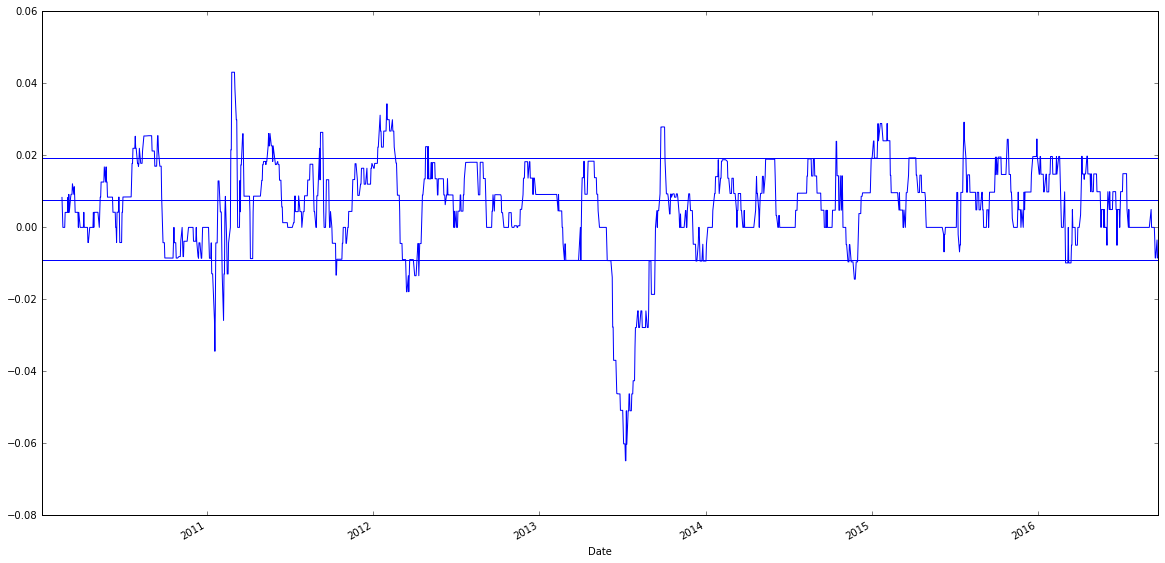

In [353]:
(ticker - ticker.shift(1)).rolling(30).median().plot()
(ticker - ticker.shift(1)).rolling(30).median().median()
axhline((ticker - ticker.shift(1)).rolling(30).median().median())

axhline((ticker - ticker.shift(1)).rolling(30).median().quantile(.9))
axhline((ticker - ticker.shift(1)).rolling(30).median().quantile(.1))

# Volatility range
print(((ticker - ticker.shift(1)).rolling(30).median().quantile(.8) - (ticker - ticker.shift(1)).rolling(30).median().quantile(.2)))

20.99206349206349
9.738095238095237
16.128
62.964285714285715
11.785714285714286
86.51190476190476
15.302197802197803


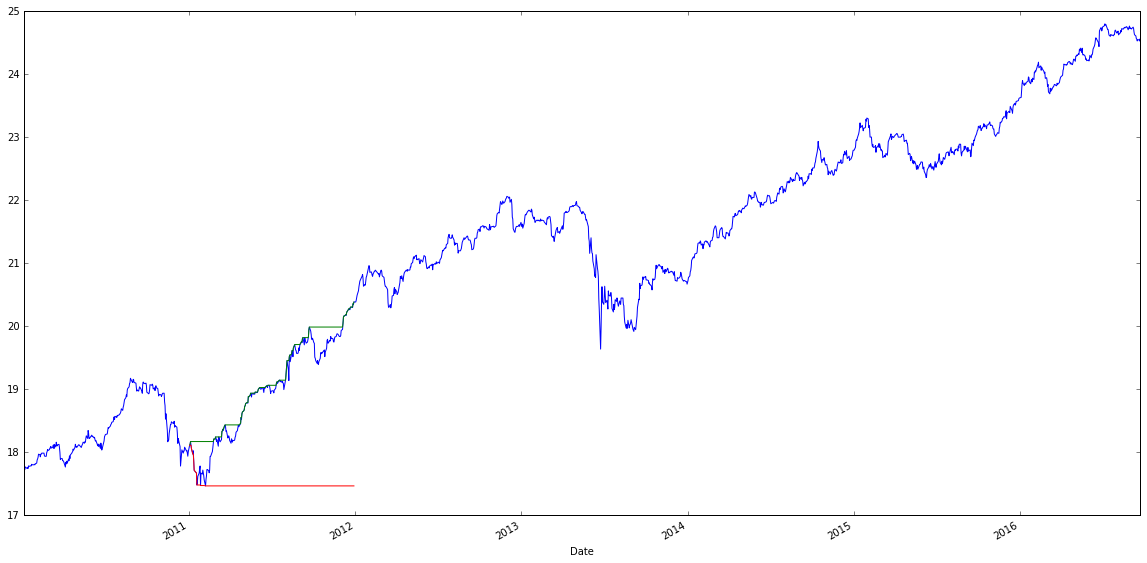

In [368]:
# Days after renewing a historical low or high
# Length of drawdowns ?
ticker.plot()

ticker.ix['2011'].expanding().max().plot()
ticker.ix['2011'].expanding().min().plot()

dd_lengths_d = {}

for y in numpy.unique(ticker.index.year):
    
    expmax = ticker.ix[str(y)].expanding().max()

    same_max_bars = np.zeros_like(expmax.values)
    same_max_counter = 0

    for i in range(len(expmax)):
        if expmax[i] == expmax.shift(1)[i]:
            same_max_counter += 1
            same_max_bars[i] = same_max_counter

        elif expmax[i] != expmax.shift(1)[i]:
            same_max_counter = 0
            same_max_bars[i] = same_max_counter
    
    dd_lengths_d[y] = np.mean(same_max_bars)
    print(pd.Series(same_max_bars, index=expmax.index).mean())#.plot(secondary_y=True)

In [388]:
np.mean(list(dd_lengths_d.values()))

31.917465899180183

In [356]:
# Consecutive up/down bars count, ratios

consec_up_bars = np.zeros_like(ticker.values)
up_counter = 0

consec_dn_bars = np.zeros_like(ticker.values)
dn_counter = 0

for i in range(len(ticker)):
    if ticker[i] > ticker.shift(1)[i]:
        up_counter += 1
        consec_up_bars[i] = up_counter
        
    elif ticker[i] < ticker.shift(1)[i]:
        up_counter = 0
        consec_up_bars[i] = up_counter
      
    
    
    if ticker[i] < ticker.shift(1)[i]:
        dn_counter += 1
        consec_dn_bars[i] = dn_counter
        
    elif ticker[i] > ticker.shift(1)[i]:
        dn_counter = 0
        consec_dn_bars[i] = dn_counter
        
updn_consec_bars_df = pd.concat([pd.Series(consec_up_bars,name='consec_up_bars'), 
                                 pd.Series(consec_dn_bars,name='consec_dn_bars')], axis=1).drop(0)

#
# Same thing for 1-2-5 period shift
#

print(updn_consec_bars_df.consec_up_bars.mean())

print(updn_consec_bars_df.consec_dn_bars.mean())

print((updn_consec_bars_df.consec_up_bars.value_counts() / updn_consec_bars_df.consec_dn_bars.value_counts()).mean())

1.273211117681845
0.7492607924305145
3.1783788921049747


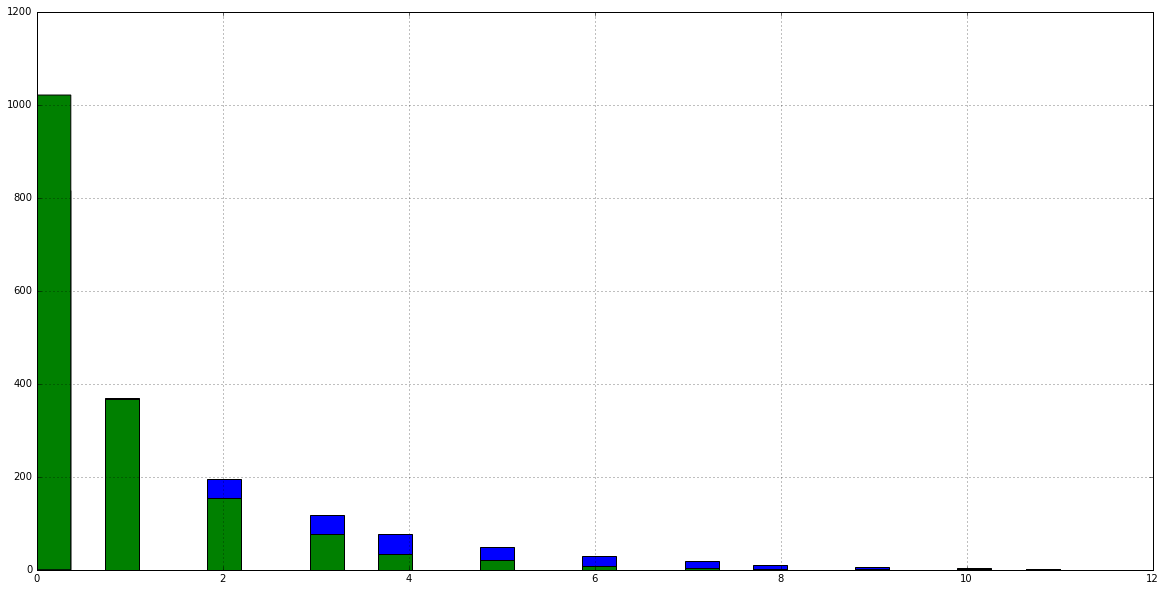

In [357]:
pd.Series(consec_up_bars).hist(bins=30)#.plot()
pd.Series(consec_dn_bars).hist(bins=30)#.plot()

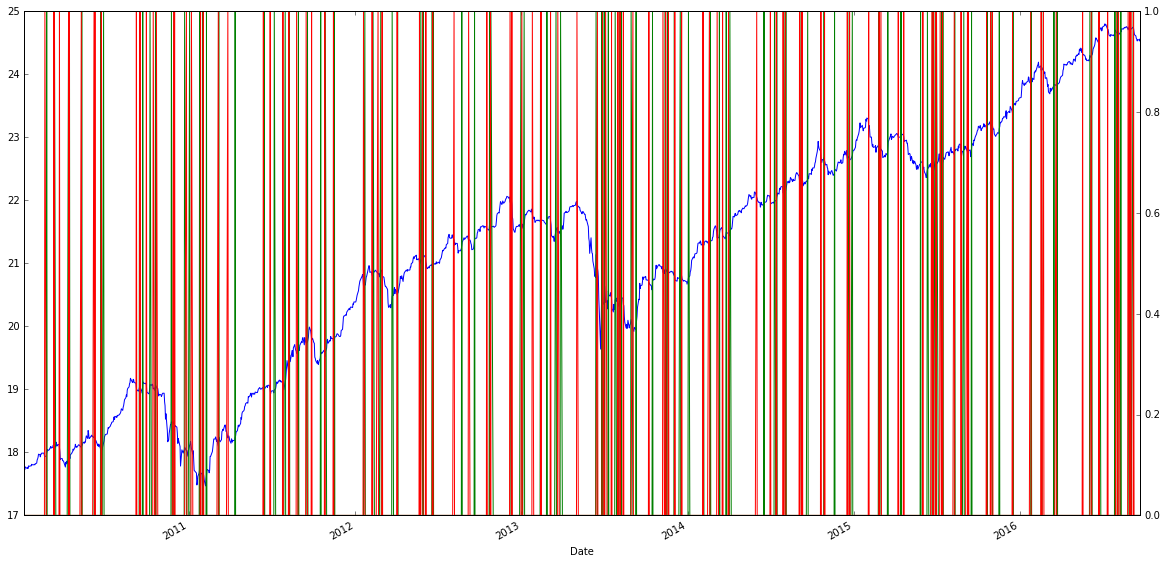

In [363]:
# Defining a Trend/meanrev regimes by EMA crossing

# Periods for EMA 5-10-30
ema = ticker.ewm(5).mean()

ticker.plot()
CrossUp(ticker, ema).plot(secondary_y=True)
CrossDown(ticker, ema).plot(secondary_y=True)

crossup = CrossUp(ticker, ema)
crossdn = CrossDown(ticker, ema)

days_wo_crossings_count = np.zeros_like(ticker.values)
days_wo_crossings_counter = 0

for i in range(len(ticker)):
    if (crossup[i] == False) | (crossdn[i] == False):
        days_wo_crossings_counter += 1
        days_wo_crossings_count[i] = days_wo_crossings_counter
                
    if (crossup[i] == True) | (crossdn[i] == True):
        days_wo_crossings_counter = 0
        days_wo_crossings_count[i] = days_wo_crossings_counter

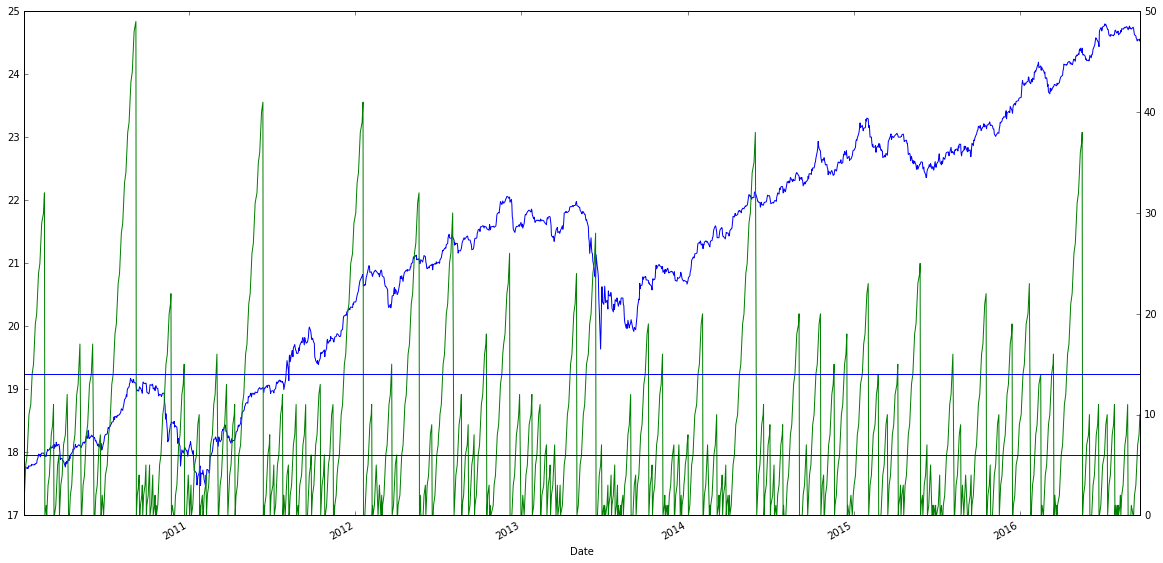

In [364]:
ticker.plot()
#CrossUp(ticker, ema).plot(secondary_y=True)
#CrossDown(ticker, ema).plot(secondary_y=True)

pd.Series(crossings_count, index=ticker.index).plot(secondary_y=True)
#axhline(pd.Series(crossings_count, index=ticker.index).mean())

axhline(pd.Series(crossings_count, index=ticker.index).median())

#axhline(pd.Series(crossings_count, index=ticker.index).quantile(0.9))

axhline(pd.Series(crossings_count, index=ticker.index).quantile(0.8))

In [360]:
pd.Series(crossings_count, index=ticker.index).mean()

43.35992907801418